# TASK-5 CREDIT CARD FRAUD DETECTION
-----
#### A MOHAMED AABIDH
----

## Importing packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Importing the dataset- CREDITCARD

In [2]:
card_df=pd.read_csv('creditcard.csv')

In [3]:
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


-------
## Exploring the dataset and performing cleaning and preprocessing 
---------

In [4]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
card_df.shape

(284807, 31)

In [7]:
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Checking the distribution legit transactions and fraud tranction 

In [8]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### THIS DATASET IS HIGHLY UNBLANCED  

##### 0= LEGIT TRANCTIONS 
##### 1= FRUAD TRANCTIONS

In [9]:
legit= card_df[card_df.Class==0]
fraud= card_df[card_df.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


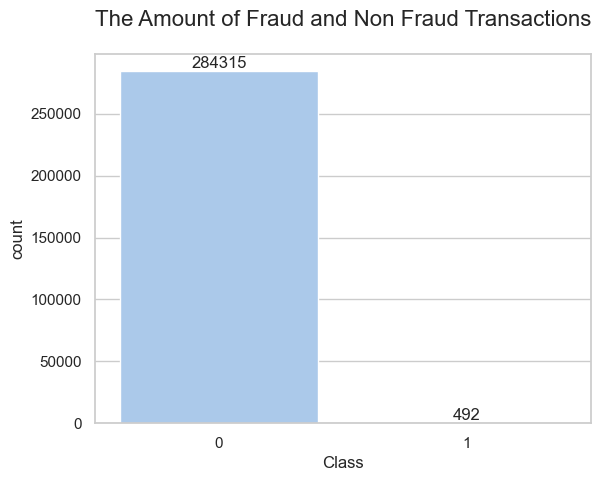

In [10]:


sns.set(style="whitegrid")

ax = sns.countplot(x='Class', data=card_df, order=[0, 1], label='Count', palette='pastel')

counts = card_df['Class'].value_counts()


for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

title = "The Amount of Fraud and Non Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)


plt.show()

### UNDER SAMPLING
Building a dataset containing similar distribution of normal and fraud transaction 

In [11]:
legit_sample=legit.sample(n=492)

In [12]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [13]:
new_dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
135762,81387.0,-0.355079,1.110748,1.292800,0.067768,0.037505,-0.991559,0.707591,-0.072643,-0.394776,...,-0.261384,-0.690051,-0.007622,0.334026,-0.159221,0.071796,0.244478,0.098743,4.99,0
65552,51640.0,1.388412,-0.395433,-0.109119,-0.716336,-0.748864,-1.210859,-0.181128,-0.228991,-1.300527,...,0.246618,0.565004,-0.142429,0.568285,0.707304,-0.112802,-0.038140,-0.007643,15.00,0
15529,26919.0,-0.755063,0.796167,1.630543,1.052632,0.330200,-0.249641,0.556690,-0.248261,-0.069000,...,-0.133652,0.136228,-0.154684,0.378072,0.325280,0.556991,-0.368812,-0.208746,12.31,0
73149,55002.0,-0.658418,-0.132319,-0.459067,-3.272415,1.535023,3.212082,-0.678681,1.394499,1.226096,...,0.192889,0.431296,-0.140080,1.070606,0.202464,-0.029745,-0.053348,-0.039081,39.90,0
125457,77681.0,0.558112,-1.834633,-0.410106,-0.221497,-1.439166,-1.165030,0.360237,-0.339353,-0.881292,...,-0.560780,-2.294861,-0.074746,0.319907,-0.237400,0.583646,-0.170822,0.081084,448.47,0


In [14]:
new_dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [15]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

### Splliting the data into features and target

In [16]:
X=new_dataset.drop(columns='Class',axis=0)
Y=new_dataset['Class']

In [17]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
135762   81387.0 -0.355079  1.110748  1.292800  0.067768  0.037505 -0.991559   
65552    51640.0  1.388412 -0.395433 -0.109119 -0.716336 -0.748864 -1.210859   
15529    26919.0 -0.755063  0.796167  1.630543  1.052632  0.330200 -0.249641   
73149    55002.0 -0.658418 -0.132319 -0.459067 -3.272415  1.535023  3.212082   
125457   77681.0  0.558112 -1.834633 -0.410106 -0.221497 -1.439166 -1.165030   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [18]:
print(Y)

135762    0
65552     0
15529     0
73149     0
125457    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Split the data into training data and test data 

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (688, 30) (296, 30)


### Model training 

In [20]:
model=LogisticRegression()

In [21]:
# training the model
model.fit(X_train,Y_train)

C:\Users\Abdul Rahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# evaluating the model by accuracy score 
X_train_predction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_predction,Y_train)

In [23]:
print('Accoracy of training model :',training_accuracy)

Accoracy of training model : 0.9418604651162791


In [24]:
 # evaluating the model by accuracy score 
X_test_predction=model.predict(X_test)
testing_accuracy=accuracy_score(X_test_predction,Y_test)
print('Accoracy of testing model :',testing_accuracy)

Accoracy of testing model : 0.9391891891891891
